<h1>Time Series Analysis with Facebook Prophet</h1>

<h3>Import Packages</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Read Files and Append Into One File</h3>

In [2]:
import pandas as pd
df = pd.read_csv('2018_11.csv')
df = df.append(pd.read_csv('2018_12.csv'))

for i in range(1,4):
    df = df.append(pd.read_csv('2019_0'+str(i)+'.csv'))
df = df[df['type'] == 'NJ Transit']

<h3>Check and Remove Null</h3>

In [3]:
df.isnull().sum()

date                  0
train_id              0
stop_sequence     59646
from                  0
from_id               3
to                    0
to_id                 3
scheduled_time    59646
actual_time           0
delay_minutes     59646
status                0
line                  0
type                  0
dtype: int64

In [4]:
df = df.dropna()

<h3>Transfer Time into Datetime Format</h3>

In [5]:
df['scheduled_time'] = pd.to_datetime(df['scheduled_time']) 
df['actual_time'] = pd.to_datetime(df['actual_time'])
df['date'] = pd.to_datetime(df['date'])
df.head(2)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-11-01,3244,1.0,Long Branch,74.0,Long Branch,74.0,2018-11-01 11:54:00,2018-11-01 11:53:36,0.000000,departed,No Jersey Coast,NJ Transit
1,2018-11-01,3244,2.0,Long Branch,74.0,Little Silver,73.0,2018-11-01 12:02:00,2018-11-01 12:02:19,0.316667,departed,No Jersey Coast,NJ Transit


<h3>Drop Uncessary Columns</h3>

In [6]:
df.drop(['from','to','status','line','type'], axis=1, inplace=True)

<h3>Check the Data</h3>

In [7]:
df.head(2)

,date,train_id,stop_sequence,from_id,to_id,scheduled_time,actual_time,delay_minutes
0,2018-11-01,3244,1.0,74.0,74.0,2018-11-01 11:54:00,2018-11-01 11:53:36,0.000000
1,2018-11-01,3244,2.0,74.0,73.0,2018-11-01 12:02:00,2018-11-01 12:02:19,0.316667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014624 entries, 0 to 239037
Data columns (total 8 columns):
date              1014624 non-null datetime64[ns]
train_id          1014624 non-null object
stop_sequence     1014624 non-null float64
from_id           1014624 non-null float64
to_id             1014624 non-null float64
scheduled_time    1014624 non-null datetime64[ns]
actual_time       1014624 non-null datetime64[ns]
delay_minutes     1014624 non-null float64
dtypes: datetime64[ns](3), float64(4), object(1)
memory usage: 69.7+ MB


<h3>Set 'scheduled_time' As Index</h3>

In [9]:
data = df.set_index(pd.DatetimeIndex(df['scheduled_time']))

<h3>Check Index</h3>

In [10]:
data.index

DatetimeIndex(['2018-11-01 11:54:00', '2018-11-01 12:02:00',
               '2018-11-01 12:06:00', '2018-11-01 12:12:00',
               '2018-11-01 12:18:00', '2018-11-01 12:22:00',
               '2018-11-01 12:32:00', '2018-11-01 12:36:00',
               '2018-11-01 12:42:00', '2018-11-01 12:51:00',
               ...
               '2019-03-31 13:50:00', '2019-03-31 13:54:00',
               '2019-03-31 13:57:00', '2019-03-31 14:01:00',
               '2019-03-31 14:04:00', '2019-03-31 14:07:00',
               '2019-03-31 14:10:00', '2019-03-31 14:16:00',
               '2019-03-31 14:25:00', '2019-03-31 14:39:00'],
              dtype='datetime64[ns]', name='scheduled_time', length=1014624, freq=None)

<h3>Check Basic Statistic Information</h3>

In [11]:
data.describe().round()

,stop_sequence,from_id,to_id,delay_minutes
count,1014624.0,1014624.0,1014624.0,1014624.0
mean,8.0,4481.0,4470.0,4.0
std,5.0,12077.0,12063.0,6.0
min,1.0,3.0,3.0,0.0
25%,4.0,62.0,61.0,1.0
50%,8.0,105.0,105.0,3.0
75%,12.0,138.0,138.0,5.0
max,26.0,43599.0,43599.0,326.0


<br> The average delay minutes is 4 mins and 75% is 5 mins.     
<br> It's abnormal that we have 326 mins as max. 
<br> Next, we will draw a plot to have a deep look

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


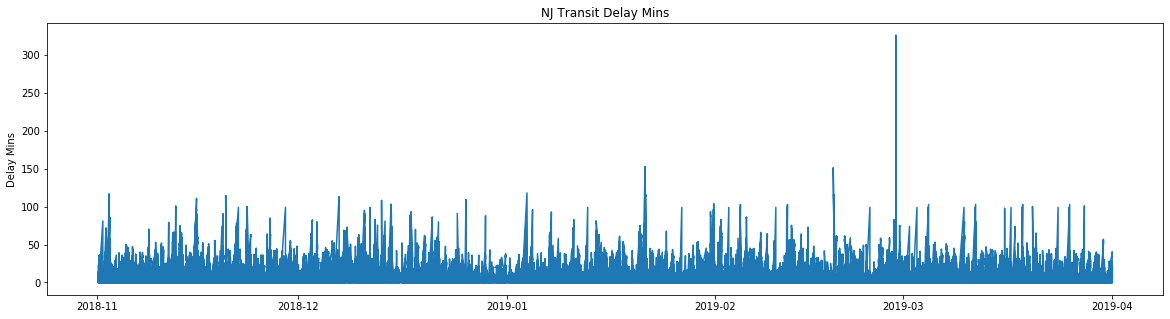

In [12]:
# setting the plot size
plt.rcParams["figure.figsize"] = (20, 5)

# plotting datetimeindex as x-axis, delay mins as y-axis
plt.plot(data.index, data['delay_minutes']) 

# setting the title
plt.title('NJ Transit Delay Mins')

# labeling the y axis
plt.ylabel('Delay Mins')

plt.show()

<br>We can easily see that around the end of Febuary, there is a high delay of NJ Transit
<br>Next we will check some abnormal situations in detail

In [13]:
#Tranis Delayed more than 150 mins
data[data['delay_minutes']>150]

,date,train_id,stop_sequence,from_id,to_id,scheduled_time,actual_time,delay_minutes
scheduled_time,,,,,,,,
2019-01-21 13:33:00,2019-01-21,9225,2.0,105.0,106.0,2019-01-21 13:33:00,2019-01-21 16:03:05,150.083333
2019-01-21 13:40:00,2019-01-21,9225,3.0,106.0,154.0,2019-01-21 13:40:00,2019-01-21 16:10:08,150.133333
2019-01-21 13:42:00,2019-01-21,9225,4.0,154.0,19.0,2019-01-21 13:42:00,2019-01-21 16:13:10,151.166667
2019-01-21 13:45:00,2019-01-21,9225,5.0,19.0,50.0,2019-01-21 13:45:00,2019-01-21 16:15:07,150.116667
2019-01-21 13:48:00,2019-01-21,9225,6.0,50.0,14.0,2019-01-21 13:48:00,2019-01-21 16:18:25,150.416667
2019-01-21 13:53:00,2019-01-21,9225,8.0,152.0,153.0,2019-01-21 13:53:00,2019-01-21 16:26:06,153.100000
2019-01-21 13:56:00,2019-01-21,9225,9.0,153.0,150.0,2019-01-21 13:56:00,2019-01-21 16:28:11,152.183333
2019-01-21 13:58:00,2019-01-21,9225,10.0,150.0,95.0,2019-01-21 13:58:00,2019-01-21 16:31:08,153.133333
2019-01-21 14:01:00,2019-01-21,9225,11.0,95.0,89.0,2019-01-21 14:01:00,2019-01-21 16:33:13,152.216667


In [14]:
#Tranis Delayed more than 300 mins
data[data['delay_minutes']>300]

,date,train_id,stop_sequence,from_id,to_id,scheduled_time,actual_time,delay_minutes
scheduled_time,,,,,,,,
2019-02-27 21:19:00,2019-02-27,3284,2.0,74.0,73.0,2019-02-27 21:19:00,2019-02-28 02:44:00,325.0
2019-02-27 21:23:00,2019-02-27,3284,3.0,73.0,130.0,2019-02-27 21:23:00,2019-02-28 02:48:00,325.0
2019-02-27 21:28:00,2019-02-27,3284,4.0,130.0,85.0,2019-02-27 21:28:00,2019-02-28 02:54:00,326.0
2019-02-27 21:34:00,2019-02-27,3284,5.0,85.0,59.0,2019-02-27 21:34:00,2019-02-28 02:59:00,325.0
2019-02-27 21:38:00,2019-02-27,3284,6.0,59.0,37169.0,2019-02-27 21:38:00,2019-02-28 03:03:00,325.0
2019-02-27 21:47:00,2019-02-27,3284,7.0,37169.0,139.0,2019-02-27 21:47:00,2019-02-28 03:13:00,326.0


After Check, this delay started from Long Branch to South Amboy and the line is North Jersey Coast Line
<br>Now let's trying to find the reason of the delay


<br>The final station of this train is NEW YORK PENN STATION
<br>According to the Tweets from @NJTRANSIT on Feb 27, 2019


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Rail service in and out Penn Station New York is subject to up to 30-minute delays due to a disabled NJ TRANSIT train in one of the Hudson River Tunnels.</p>&mdash; NJ TRANSIT (@NJTRANSIT) <a href="https://twitter.com/NJTRANSIT/status/1100901126931652619?ref_src=twsrc%5Etfw">February 27, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

<br>The delay was caused by a disabled train which is not happened frequently
<br>
<br>As a result, we can remove these situations to have a better prediction

In [15]:
data_normal = data[data['delay_minutes']< 300]

In [16]:
data_normal.describe().round()

,stop_sequence,from_id,to_id,delay_minutes
count,1014618.0,1014618.0,1014618.0,1014618.0
mean,8.0,4481.0,4470.0,4.0
std,5.0,12077.0,12063.0,6.0
min,1.0,3.0,3.0,0.0
25%,4.0,62.0,61.0,1.0
50%,8.0,105.0,105.0,3.0
75%,12.0,138.0,138.0,5.0
max,26.0,43599.0,43599.0,153.0


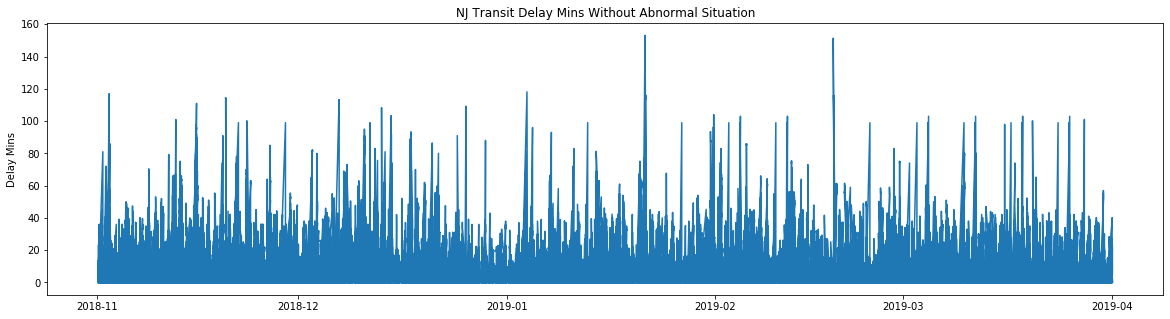

In [17]:
# setting the plot size
plt.rcParams["figure.figsize"] = (20, 5)

# plotting datetimeindex as x-axis, delay mins as y-axis
plt.plot(data_normal.index, data_normal['delay_minutes']) 

# setting the title
plt.title('NJ Transit Delay Mins Without Abnormal Situation')

# labeling the y axis
plt.ylabel('Delay Mins')

plt.show()

<h4>
    <br>Now, we get a better data set which can represent normal NJ Transit
    <br>
    <br>Next, we will apply Time Series Analysis with Facebook Prophet
</h4>

Time series are one of the most common data types encountered in daily life.
<br>Financial prices, weather, home energy usage, and even weight are all examples of data that can be collected at regular intervals. 

The Facebook Prophet package was released in 2017 for Python and R
<br>Prophet is designed for analyzing time series with daily observations that display patterns on different time scales. 
<br>It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints.
<br>
<br>
We first import prophet and rename the columns in our data to the correct format. 
<br>The Date column must be called ‘ds’ and the value column we want to predict ‘y’. 
<br>We then create prophet models and fit them to the data, much like a Scikit-Learn machine learning model.

In [18]:
#https://facebook.github.io/prophet/docs/quick_start.html
from fbprophet import Prophet

In [19]:
#Get Normal Data without index, we don't need index now in Facebook Prophet 
df_normal = df[df['delay_minutes']< 300]

In [20]:
df_normal.describe().round()

,stop_sequence,from_id,to_id,delay_minutes
count,1014618.0,1014618.0,1014618.0,1014618.0
mean,8.0,4481.0,4470.0,4.0
std,5.0,12077.0,12063.0,6.0
min,1.0,3.0,3.0,0.0
25%,4.0,62.0,61.0,1.0
50%,8.0,105.0,105.0,3.0
75%,12.0,138.0,138.0,5.0
max,26.0,43599.0,43599.0,153.0


In [21]:
df_normal.head()

,date,train_id,stop_sequence,from_id,to_id,scheduled_time,actual_time,delay_minutes
0,2018-11-01,3244,1.0,74.0,74.0,2018-11-01 11:54:00,2018-11-01 11:53:36,0.000000
1,2018-11-01,3244,2.0,74.0,73.0,2018-11-01 12:02:00,2018-11-01 12:02:19,0.316667
2,2018-11-01,3244,3.0,73.0,130.0,2018-11-01 12:06:00,2018-11-01 12:09:11,3.183333
3,2018-11-01,3244,4.0,130.0,85.0,2018-11-01 12:12:00,2018-11-01 12:13:18,1.300000
4,2018-11-01,3244,5.0,85.0,59.0,2018-11-01 12:18:00,2018-11-01 12:20:03,2.050000


In [22]:
 # renaming column to ds
df_normal.rename(columns={'scheduled_time': 'ds'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Select only the relevant columns for forecasting
df_prophet = df_normal.ix[:, ['ds', 'delay_minutes',]]

df_prophet.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



,ds,delay_minutes
0,2018-11-01 11:54:00,0.000000
1,2018-11-01 12:02:00,0.316667
2,2018-11-01 12:06:00,3.183333
3,2018-11-01 12:12:00,1.300000
4,2018-11-01 12:18:00,2.050000


In [24]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014618 entries, 0 to 239037
Data columns (total 2 columns):
ds               1014618 non-null datetime64[ns]
delay_minutes    1014618 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.2 MB


In [25]:
# Prophet requires columns ds (Date) and y (value for forecasting)
df_prophet = df_prophet.rename(columns={'delay_minutes': 'y'})

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
delay_prophet = Prophet()
delay_prophet.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [26]:
# Make a future dataframe for 7 day 
delay_future_dataframe = delay_prophet.make_future_dataframe(periods=7)

# Make predictions
delay_predict = delay_prophet.predict(delay_future_dataframe)

Text(0.5, 1, 'NJ Transit Delay Minutes Prediction')

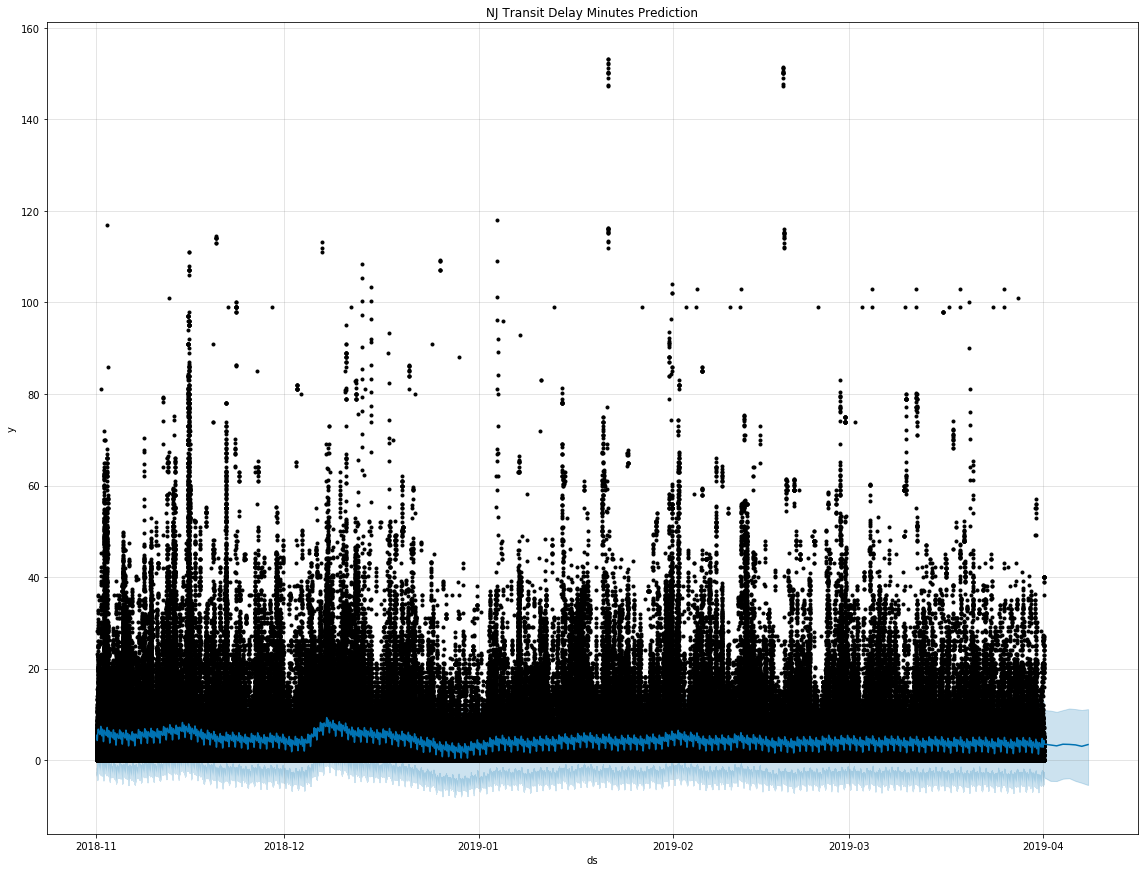

In [27]:
#delay_prophet.plot(delay_predict, xlabel = 'Date', ylabel = 'Delay Mins')

from fbprophet.plot import plot

plot(delay_prophet, delay_predict, figsize=(16, 12))
plt.title('NJ Transit Delay Minutes Prediction')

<br>Due to the high fluctuation, it's not very clear to see the prediction and the trend.
<br>
<br>We will split this plot into trend, yearly seasonality, and weekly seasonality of the time series.  

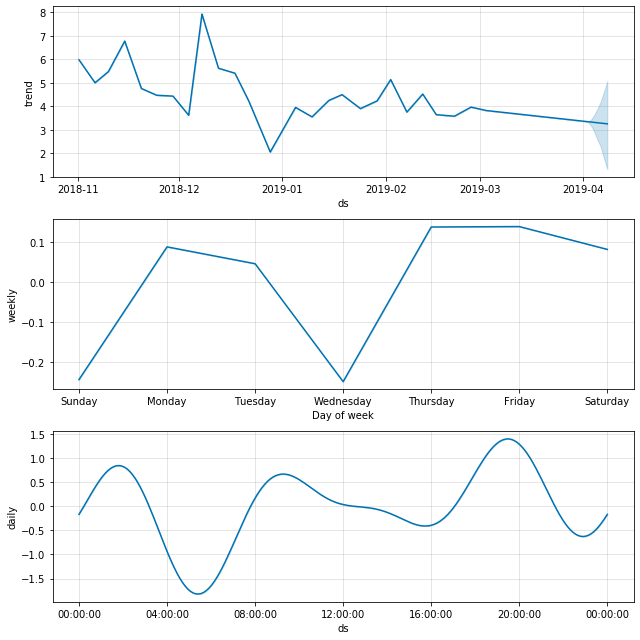

In [28]:
delay_split = delay_prophet.plot_components(delay_predict)

According to the trend part, we can see that the overall trend of delay minutes is decreasing which is a good news.
<br>During a week, Sunday and Wednesday are great days to take NJ Transit because they have least delay.
<br>On the opposite, trains on Thursday and Friday are more likely to be delayed.
<br>
<br>During a day, time around 9 am and 7 pm are peak times because of the work commuters.
<br>Trains also got many delays around 2 am. 
<br>This may because there are less train staff during this time.

<h2>Automatic changepoint detection in Prophet</h2>

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. 

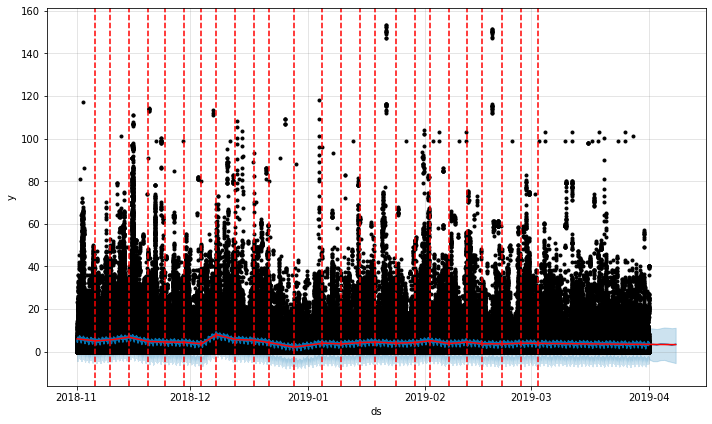

In [29]:
from fbprophet.plot import add_changepoints_to_plot
fig = delay_prophet.plot(delay_predict)
a = add_changepoints_to_plot(fig.gca(), delay_prophet, delay_predict)

<h2>Diagnostics</h2>
Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. 

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

<img src="https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png">

In [30]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(delay_prophet, period='15 days', horizon = '7 days')
df_cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-11-25 03:10:00 and 2019-03-25 03:10:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-11-25 03:13:00,3.004663,-6.679809,12.765498,1.100000,2018-11-25 03:10:00
1,2018-11-25 03:22:00,2.836850,-7.195098,12.394706,0.000000,2018-11-25 03:10:00
2,2018-11-25 03:48:00,2.385678,-7.318251,12.243165,9.583333,2018-11-25 03:10:00
3,2018-11-25 03:54:00,2.294401,-7.659857,11.229298,3.583333,2018-11-25 03:10:00
4,2018-11-25 04:00:00,2.209808,-7.301374,11.838781,2.433333,2018-11-25 03:10:00


The output of cross_validation is a dataframe with the <b>true values y and the out-of-sample forecast values yhat</b>, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of <b>yhat vs. y</b>.

In [31]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,15:27:00,24.845259,4.984502,3.333910,0.941077
1,15:28:00,24.880525,4.988038,3.337846,0.940909
2,15:29:00,24.989466,4.998947,3.345184,0.940615
3,15:30:00,25.084558,5.008449,3.349188,0.940500
4,15:31:00,25.120285,5.012014,3.352801,0.940371


The metrics includes /mean squared error, MSE/、 /root mean squared error, RMSE/、/mean absolute error, MAE/、/mean absolute percent error, MAPE/ and the estimate coverage of yhat_lower and yhat_upper.
